## Задание 1

In [15]:
import numpy as np
from scipy.stats import chi2, norm, gamma
import matplotlib.pyplot as plt
import math

Выбранные параметры для задания:
* Количество выборок: 30000
* Размер одной выборки: 3000
* Непрерывное распределение: хи-квадрат с 42 степенями свободы

In [16]:
sample_size = 3000
sample_count = 30000
distr = chi2(42)

Теоретические среднее значение, дисперсия, медиана и четвертый центральный момент для выбраного распределения. Значение четвертого центрального момента вычислено через значение эксцесса и дисперсии по формуле: 
$$ \gamma_2 = \frac{\mu_4}{\sigma^4} - 3 = \frac{\mu_4}{D^2} - 3$$
где $\gamma_2$ &ndash; эксцесс, $D$ &ndash; дисперсия, $\mu_4$ &ndash; 4-ый центральный момент

In [17]:
t_mean, t_var, t_skew, t_kurt = distr.stats(moments='mvsk')
t_forth_m = (t_kurt + 3) * t_var**2
t_med = distr.median()

Функции для вычисления выборочного среднего, несмещенной выборочной дисперсии и выборочной медианы с использованием функций из библиотеки `numpy`

In [18]:
def sample_mean(sample):
    return np.mean(sample)

def sample_var(sample):
    n = len(sample)
    return n * np.var(sample) / (n - 1)

def sample_med(sample):
    return np.median(sample)

Теоретические распределения для выборочного среднего, несмещенной выборочной дисперсии и выборочной медианы. Поскольку эти величины асимптотически нормальные, то при стремлении размера выборки к бесконечности их распределение стремится к нормальному согласно формулам (везде при $n \rightarrow \infty$):
* Для выборочного среднего: $$ \sqrt{n}(\overline{X} - \mu) \rightarrow N(0, \sigma^2) $$
* Для выборочной дисперсии: $$ \sqrt{n}\frac{S_{*}^2 - \sigma^2}{\sqrt{\hat{\mu_4} - S_{*}^4}} \rightarrow N(0, 1) $$  
  В силу состоятельности $\hat{\mu_4}$ и $S_{*}^2$: $\hat{\mu_4} \rightarrow \mu_4$, $S_{*}^2 \rightarrow \sigma^2$
  
  В итоге: $$ \sqrt{n}\frac{S_{*}^2 - \sigma^2}{\sqrt{\mu_4 - \sigma^4}} \rightarrow N(0, 1), $$где $\mu_4$ &ndash; 4ый центральный теоретический момент, $\sigma^2$ &ndash; теоретическая дисперсия
* Для медианы (квантили порядка $\alpha = 0.5$):
   $$ \sqrt{n}\frac{X_{\lfloor n\alpha \rfloor} - q_{\alpha}}{\sqrt{\alpha(1 - \alpha)}}f(q_{\alpha}) \rightarrow N(0, 1),$$ где $q_{\alpha}$ &ndash; теоретическая квантиль порядка $\alpha$, $f(x)$ &ndash; плотность теоретического распределения


Для порядковых статистик ($2$ и $n-2$) по условию:
  $$ nF(X_{(2)}) \rightarrow \Gamma(2, 1) $$
  $$ n(1 - F(X_{(n - 2)})) \rightarrow \Gamma(3, 1) $$

In [19]:
theoretical_mean_distr = norm(t_mean, math.sqrt(t_var / sample_size))
theoretical_var_distr = norm(t_var, math.sqrt((t_forth_m - t_var**2) / sample_size))
theoretical_med_distr = norm(t_med, math.sqrt(0.25 / sample_size) / distr.pdf(t_med))

theoretical_snd_order_stat_distr = gamma(2)
theoretical_pp_last_order_stat_distr = gamma(3)

Функция для построения гистограммы и графика теоретической плотности распределения


In [20]:
def print_hist(sample, theoretical_distr, bins=50, dots=100, title=None):
    fig, ax = plt.subplots(1, 1)
    ax.hist(sample, bins=bins, density=True, color='royalblue')
    x_range = np.linspace(min(sample), max(sample), dots)
    ax.plot(x_range, theoretical_distr(x_range), color='red', label='theoretical distribution')
    ax.legend()
    if title:
        ax.set_title(title)
    plt.show()

def print_stat(name, sample_stat, theoretical_stat):
    print(name)
    print('\tSample: %f' % sample_stat)
    print('\tTheory: %f' % theoretical_stat)

Генерация выборок, вычисление выборочных статистик и построение гистограмм:

Sample mean histogram
Mean
	Sample: 42.000635
	Theory: 42.000000
Variance
	Sample: 0.028401
	Theory: 0.028000
Median
	Sample: 42.000689
	Theory: 42.000000


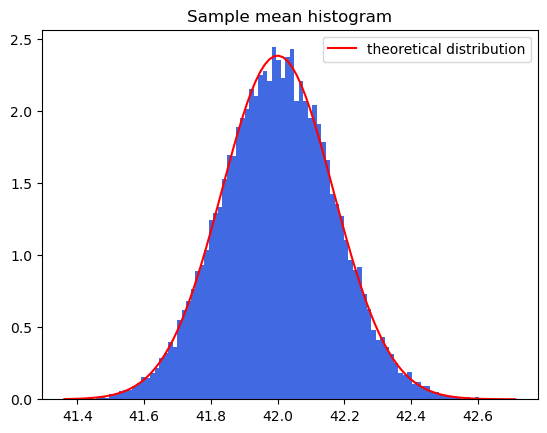

Sample variance histogram
Mean
	Sample: 84.024522
	Theory: 84.000000
Variance
	Sample: 5.410836
	Theory: 5.376000
Median
	Sample: 84.003152
	Theory: 84.000000


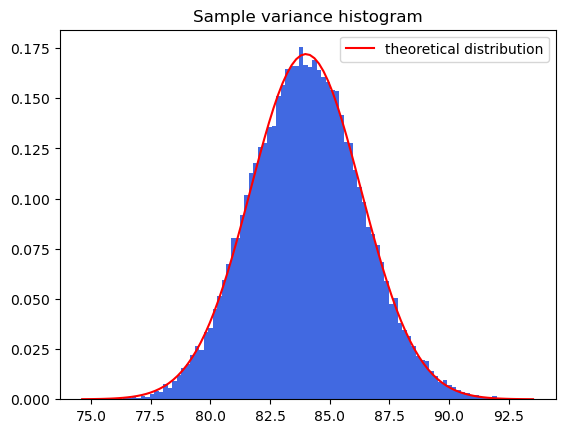

Sample median histogram
Mean
	Sample: 41.337037
	Theory: 41.335247
Variance
	Sample: 0.043422
	Theory: 0.043169
Median
	Sample: 41.336381
	Theory: 41.335247


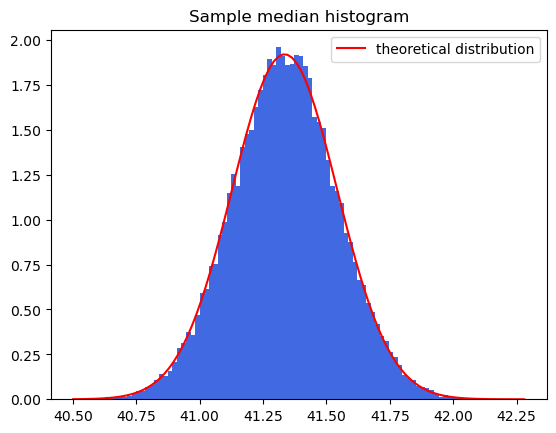

Histogram of nF(X_2)
Mean
	Sample: 2.004473
	Theory: 2.000000
Variance
	Sample: 2.024860
	Theory: 2.000000
Median
	Sample: 1.684483
	Theory: 1.678347


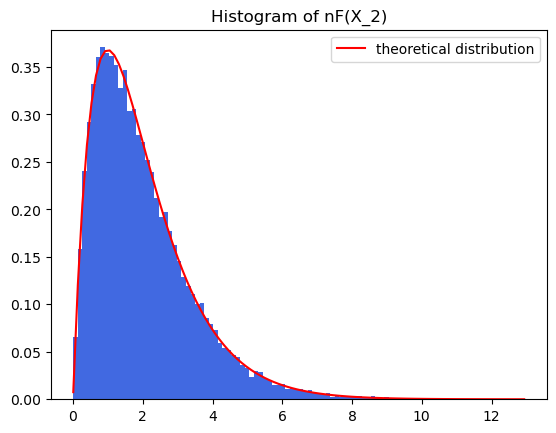

Histogram of n(1 - F(X_(n-2)))
Mean
	Sample: 2.997934
	Theory: 3.000000
Variance
	Sample: 3.039279
	Theory: 3.000000
Median
	Sample: 2.662990
	Theory: 2.674060


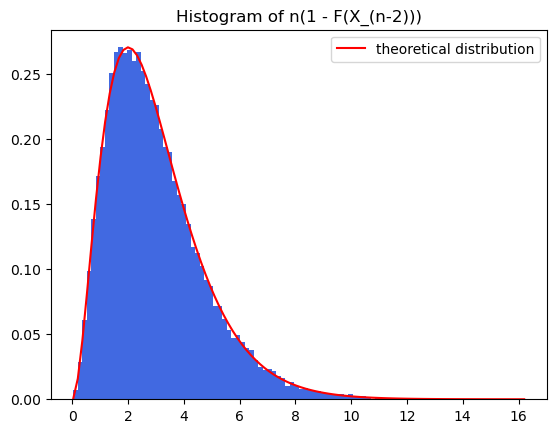

In [21]:
smpl_means = []
smpl_vars = []
smpl_meds = []
snd_order_stats = []
pp_last_order_stats = []

histograms = [
    { 'sample' : smpl_means,
      'theoretical_distr' : theoretical_mean_distr,
      'title' : 'Sample mean histogram' },
    { 'sample' : smpl_vars,
      'theoretical_distr' : theoretical_var_distr,
      'title' : 'Sample variance histogram' },
    { 'sample' : smpl_meds,
      'theoretical_distr' : theoretical_med_distr,
      'title' : 'Sample median histogram' },
    { 'sample' : snd_order_stats,
      'theoretical_distr' : theoretical_snd_order_stat_distr,
      'title' : 'Histogram of nF(X_2)' },
    { 'sample' : pp_last_order_stats,
      'theoretical_distr' : theoretical_pp_last_order_stat_distr,
      'title' : 'Histogram of n(1 - F(X_(n-2)))' }
]

for _ in range(sample_count):
    sample = distr.rvs(size=sample_size)
    smpl_means.append(sample_mean(sample))
    smpl_vars.append(sample_var(sample))
    smpl_meds.append(sample_med(sample))

    snd_order_stats.append(sample_size * distr.cdf(np.sort(sample)[1]))
    pp_last_order_stats.append(sample_size * (1 - distr.cdf(np.sort(sample)[-3])))

for hist in histograms:
    print(hist['title'])
    print_stat('Mean', sample_mean(hist['sample']), hist['theoretical_distr'].mean())
    print_stat('Variance', sample_var(hist['sample']), hist['theoretical_distr'].var())
    print_stat('Median', sample_med(hist['sample']), hist['theoretical_distr'].median())
    print_hist(hist['sample'], lambda x : hist['theoretical_distr'].pdf(x), title=hist['title'])